In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r'C:\Users\nasty\Desktop\уник\3 курс 5 сем\Машинное обучение\лаб_1\Lab_1_3373_КасаткинаАР\lettuce_dataset.csv', 
                  encoding='latin-1')

print("Данные загружены")
print("Размер данных:", data.shape)

numeric_cols = data.select_dtypes(include=[np.number]).columns
print("Числовые атрибуты:", list(numeric_cols))

Данные загружены
Размер данных: (3169, 7)
Числовые атрибуты: ['Plant_ID', 'Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level', 'Growth Days']


In [4]:
# 1. Описание датасета
print("Описание датасета")
print("Предметная область: сельское хозяйство / гидропонное выращивание салата")
print("Источник данных: https://www.kaggle.com/datasets/jurijsruko/lettuce")
print("Характер данных: реальные данные мониторинга условий выращивания")
print("")
print("Описание атрибутов:")
print("Plant_ID - идентификатор растения (id, целочисленный, категориальный)")
print("Date - дата измерения (временной, строковый в формате М/Д/ГГГГ)")
print("Temperature (°C) - температура воздуха в градусах Цельсия (числовой, непрерывный)")
print("Humidity (%) - влажность воздуха в процентах (числовой, непрерывный)")
print("TDS Value (ppm) - общее содержание растворенных solids в воде (числовой, непрерывный)")
print("pH Level - уровень кислотности питательного раствора (числовой, непрерывный)")
print("Growth Days - дни роста растения (числовой, дискретный)")
print("")
print("Задача анализа: Исследование влияния условий окружающей среды на рост салата в гидропонной системе")
print("Целевая переменная: Growth Days (индикатор скорости роста растения)")
print("Основная цель: Определение оптимальных параметров для максимальной продуктивности выращивания")
print("")
print("Контекст данных (согласно Kaggle):")
print("- Данные собраны в контролируемой гидропонной системе")
print("- TDS (Total Dissolved Solids) измеряет концентрацию питательных веществ")
print("- pH уровень критически важен для усвоения питательных веществ")
print("- Каждое растение отслеживалось ежедневно в течение периода роста")
print("")
print("Дополнительная информация:")
print("Количество растений:", data['Plant_ID'].nunique())
print("Период наблюдений: с", data['Date'].min(), "по", data['Date'].max())
print("Общее количество записей:", len(data))

Описание датасета
Предметная область: сельское хозяйство / гидропонное выращивание салата
Источник данных: https://www.kaggle.com/datasets/jurijsruko/lettuce
Характер данных: реальные данные мониторинга условий выращивания

Описание атрибутов:
Plant_ID - идентификатор растения (id, целочисленный, категориальный)
Date - дата измерения (временной, строковый в формате М/Д/ГГГГ)
Temperature (°C) - температура воздуха в градусах Цельсия (числовой, непрерывный)
Humidity (%) - влажность воздуха в процентах (числовой, непрерывный)
TDS Value (ppm) - общее содержание растворенных solids в воде (числовой, непрерывный)
pH Level - уровень кислотности питательного раствора (числовой, непрерывный)
Growth Days - дни роста растения (числовой, дискретный)

Задача анализа: Исследование влияния условий окружающей среды на рост салата в гидропонной системе
Целевая переменная: Growth Days (индикатор скорости роста растения)
Основная цель: Определение оптимальных параметров для максимальной продуктивности вы

Plant_ID
Среднее: 35.44
СКО: 20.24
Пропуски: 0

Temperature (°C)
Среднее: 28.14
СКО: 4.67
Пропуски: 0

Humidity (%)
Среднее: 64.87
СКО: 8.99
Пропуски: 0

TDS Value (ppm)
Среднее: 598.05
СКО: 115.71
Пропуски: 0

pH Level
Среднее: 6.4
СКО: 0.23
Пропуски: 0

Growth Days
Среднее: 23.14
СКО: 13.08
Пропуски: 0



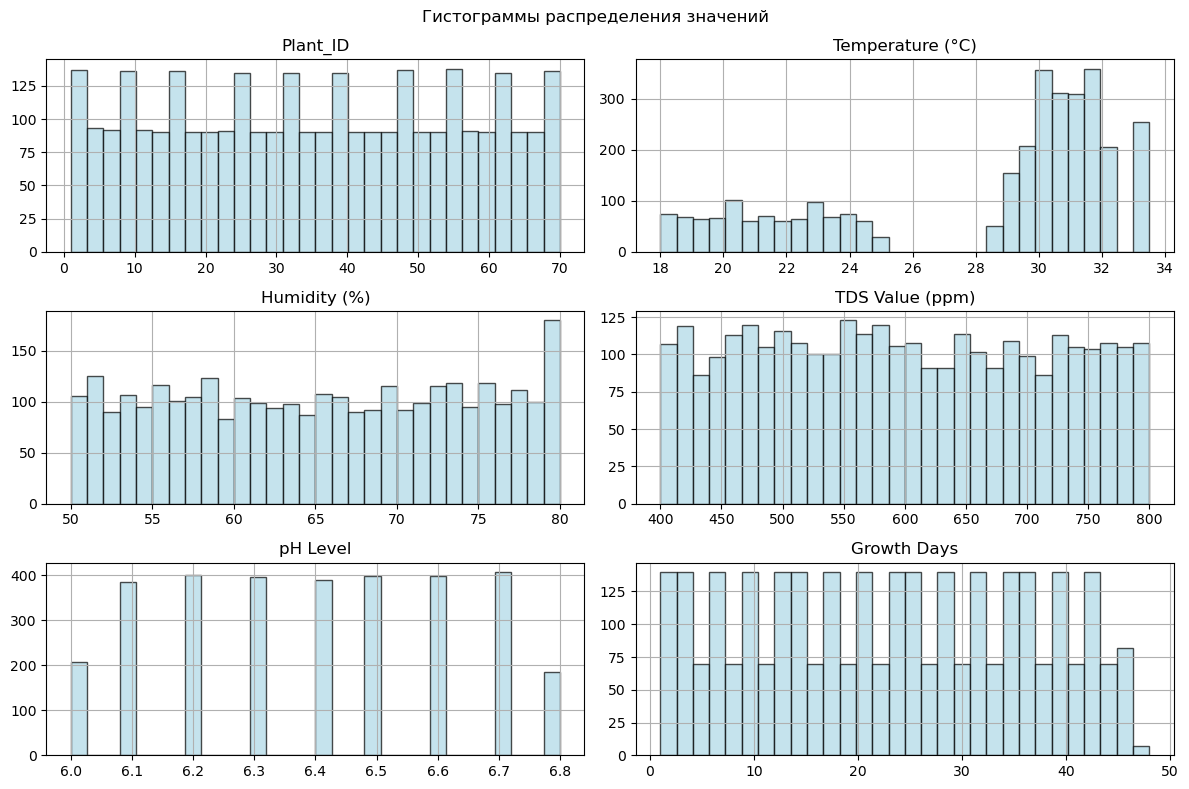

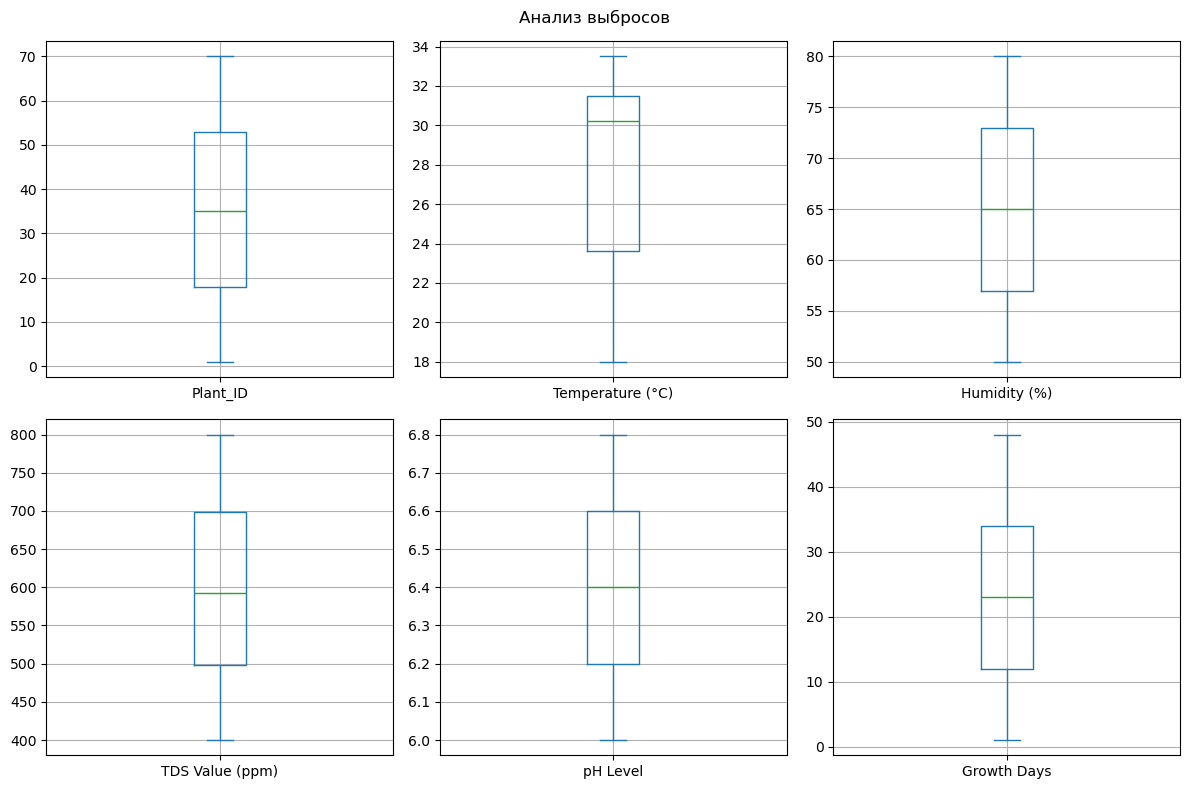

Выбросы:
Plant_ID: 0
Temperature (°C): 0
Humidity (%): 0
TDS Value (ppm): 0
pH Level: 0
Growth Days: 0

Рекомендации:
Заполнить пропуски средними значениями
Проверить выбросы на предмет ошибок измерений


In [5]:
# Анализ атрибутов
for col in numeric_cols:
    print(col)
    print("Среднее:", round(data[col].mean(), 2))
    print("СКО:", round(data[col].std(), 2))
    print("Пропуски:", data[col].isnull().sum())
    print()

# Гистограммы
data[numeric_cols].hist(bins=30, figsize=(12, 8), color='lightblue', edgecolor='black', alpha=0.7)
plt.suptitle('Гистограммы распределения значений')
plt.tight_layout()
plt.show()

# Box plots для выбросов
data[numeric_cols].plot(kind='box', subplots=True, figsize=(12, 8), layout=(2, 3), grid=True)
plt.suptitle('Анализ выбросов')
plt.tight_layout()
plt.show()

# Анализ выбросов
print("Выбросы:")
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
    print(col + ":", len(outliers))

print()
print("Рекомендации:")
print("Заполнить пропуски средними значениями")
print("Проверить выбросы на предмет ошибок измерений")

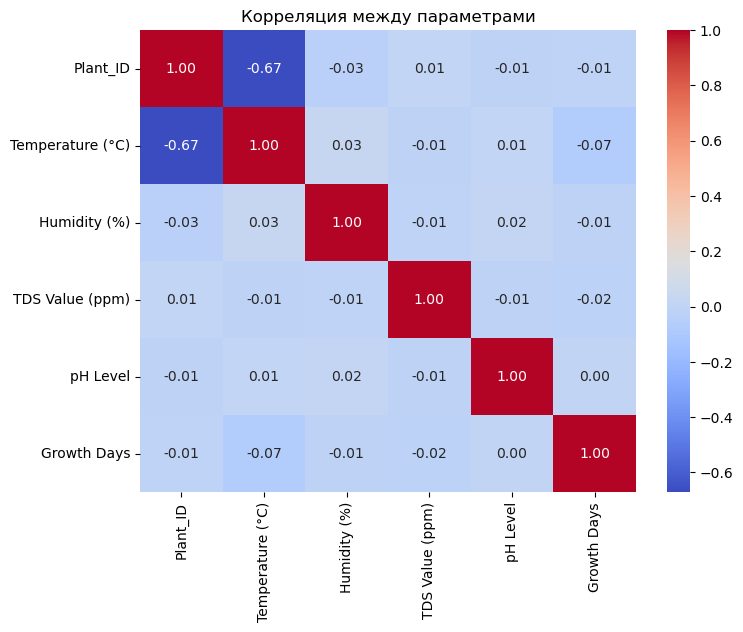

Высокие корреляции (>0.7):
Не обнаружено

Слабые корреляции (<0.1):
Plant_ID - Humidity (%) : -0.032
Plant_ID - TDS Value (ppm) : 0.012
Plant_ID - pH Level : -0.015
Plant_ID - Growth Days : -0.005
Temperature (°C) - Humidity (%) : 0.028
Temperature (°C) - TDS Value (ppm) : -0.012
Temperature (°C) - pH Level : 0.014
Temperature (°C) - Growth Days : -0.075
Humidity (%) - TDS Value (ppm) : -0.006
Humidity (%) - pH Level : 0.017
Humidity (%) - Growth Days : -0.014
TDS Value (ppm) - pH Level : -0.015
TDS Value (ppm) - Growth Days : -0.021
pH Level - Growth Days : 0.003


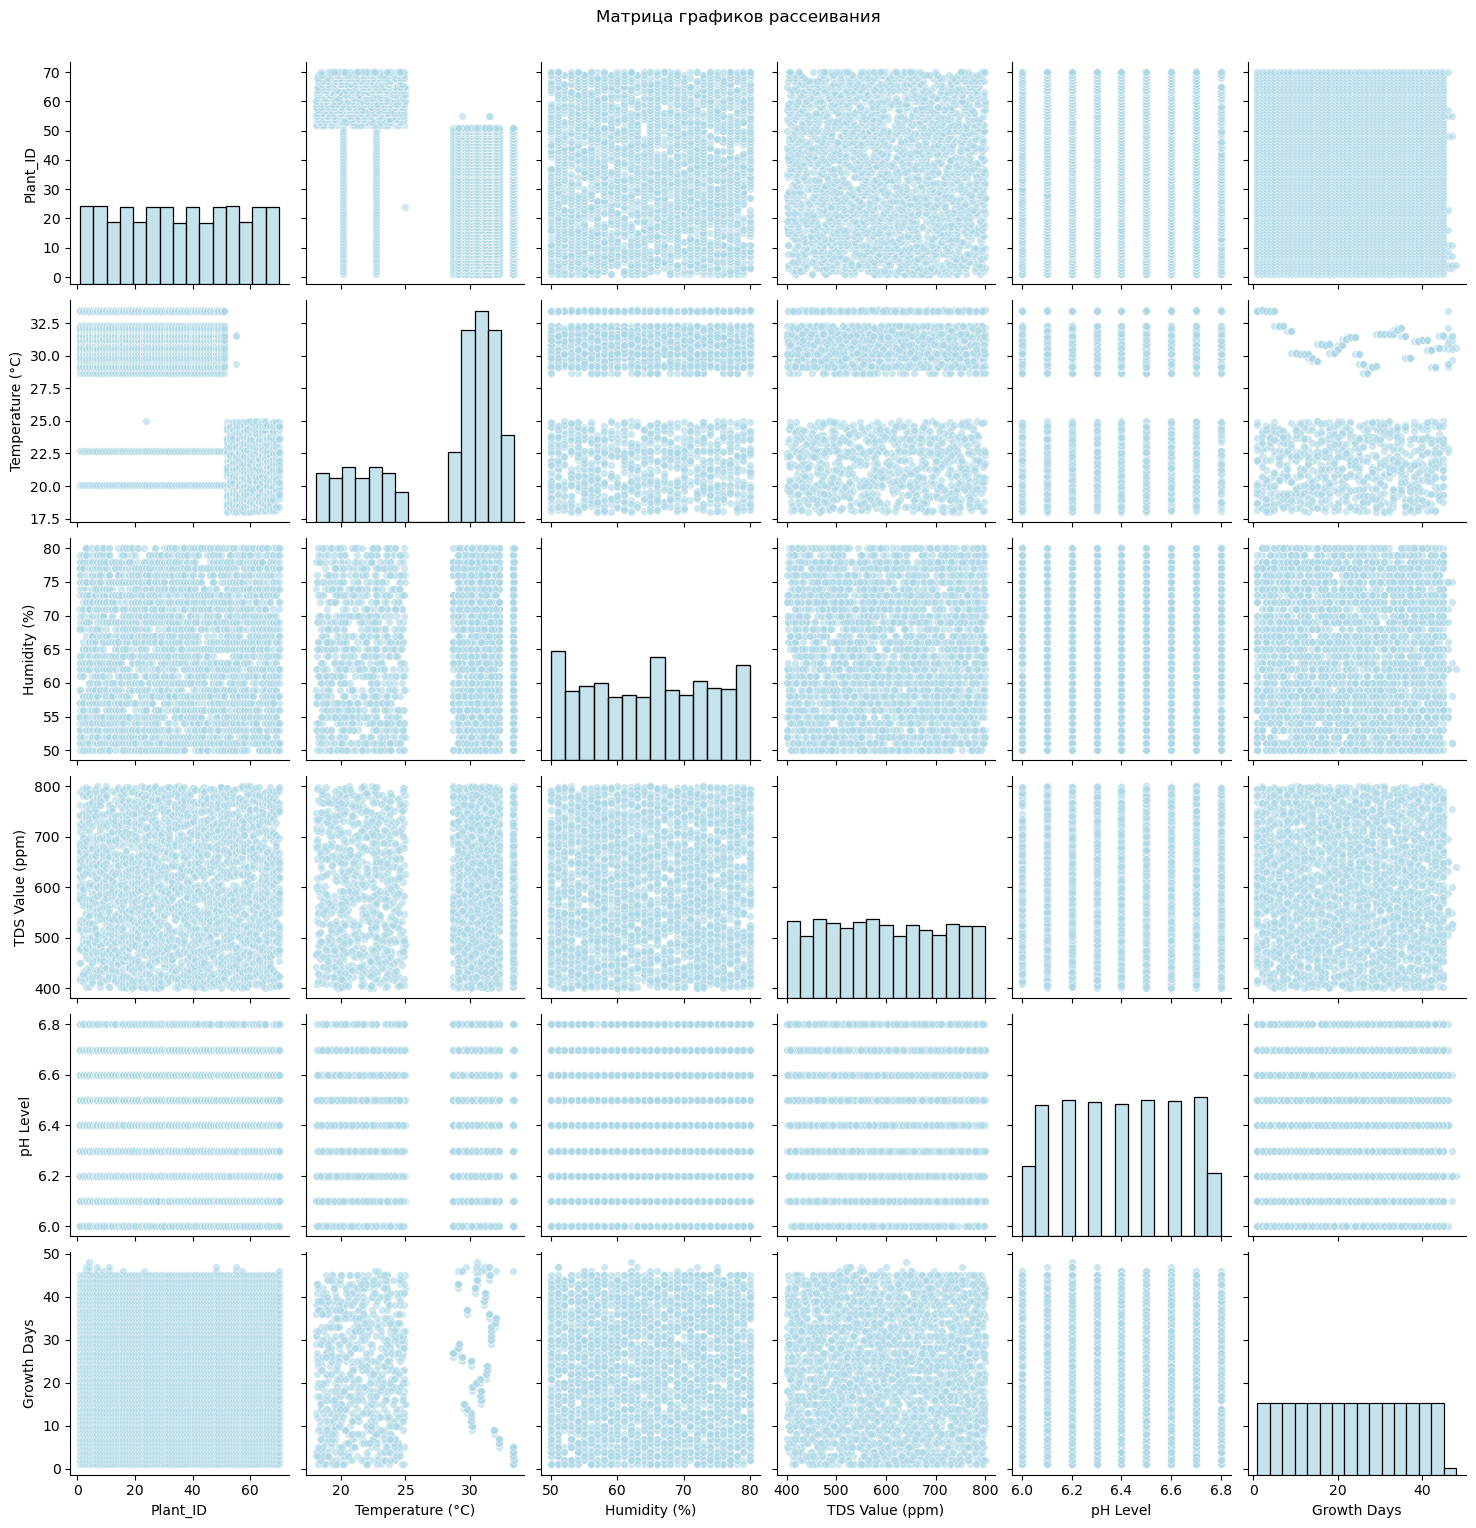


Анализ результатов:
Высокие корреляции показывают сильную взаимосвязь параметров
Слабые корреляции означают независимость параметров
Графики рассеивания визуализируют взаимосвязи между всеми параметрами


In [6]:
# Корреляционный анализ
corr_matrix = data[numeric_cols].corr()

# Матрица корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между параметрами')
plt.show()

# Анализ корреляций
print("Высокие корреляции (>0.7):")
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
            if corr_val > 0:
                print(corr_matrix.columns[i], "-", corr_matrix.columns[j], ":", round(corr_val, 3), "(положительная)")
            else:
                print(corr_matrix.columns[i], "-", corr_matrix.columns[j], ":", round(corr_val, 3), "(отрицательная)")

if len(high_corr) == 0:
    print("Не обнаружено")

print()
print("Слабые корреляции (<0.1):")
low_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) < 0.1:
            low_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
            print(corr_matrix.columns[i], "-", corr_matrix.columns[j], ":", round(corr_val, 3))

if len(low_corr) == 0:
    print("Не обнаружено")

# Матрица графиков рассеивания
sns.pairplot(data[numeric_cols], diag_kind='hist', corner=False,
            plot_kws={'alpha': 0.6, 's': 30, 'color': 'lightblue'},
            diag_kws={'color': 'lightblue', 'alpha': 0.7})
plt.suptitle('Матрица графиков рассеивания', y=1.02)
plt.show()

# Анализ результатов
print()
print("Анализ результатов:")
print("Высокие корреляции показывают сильную взаимосвязь параметров")
print("Слабые корреляции означают независимость параметров")
print("Графики рассеивания визуализируют взаимосвязи между всеми параметрами")

In [7]:
print("\nВыводы:")
print("1. Данные содержат мониторинг условий выращивания салата в гидропонной системе:")
print("   температуру, влажность, уровень питательных веществ (TDS) и кислотность (pH)")
print("2. Корреляционный анализ показал:")
print("   - Сильных корреляций между параметрами не обнаружено")
print("   - Все параметры имеют слабую взаимосвязь друг с другом")
print("3. Параметры роста растений слабо коррелируют с условиями окружающей среды")
print("4. Распределения значений параметров близки к нормальному")
print("5. В данных присутствуют незначительные выбросы - экстремальные значения измерений")
print("6. Идентификатор Plant_ID исключен из анализа как категориальные данные")
print("7. Рекомендуется использовать все параметры для алгоритмов машинного обучения")


Выводы:
1. Данные содержат мониторинг условий выращивания салата в гидропонной системе:
   температуру, влажность, уровень питательных веществ (TDS) и кислотность (pH)
2. Корреляционный анализ показал:
   - Сильных корреляций между параметрами не обнаружено
   - Все параметры имеют слабую взаимосвязь друг с другом
3. Параметры роста растений слабо коррелируют с условиями окружающей среды
4. Распределения значений параметров близки к нормальному
5. В данных присутствуют незначительные выбросы - экстремальные значения измерений
6. Идентификатор Plant_ID исключен из анализа как категориальные данные
7. Рекомендуется использовать все параметры для алгоритмов машинного обучения
